<a href="https://colab.research.google.com/github/solobala/MDS27/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22MDS27_DZ91_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание "Центральная предельная теорема и статистика".

### Задание.
В этом задании нужно убедиться, что ЦПТ действительно работает.

Создайте случайную величину из любого выбранного вами распределения, для разных значений n сгенерируйте 1000 выборок размера n. Постройте гистрограммы средних этих выборок и сделайте выводы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
# 'Непрерывные вероятностные распределения в scipy.stats
dist_cont = [d for d in dir(sts) if  isinstance(getattr(sts,d), sts.rv_continuous) ]
print(f'Непрерывные вероятностные распределения в scipy.stats, всего: {len(dist_cont)}')
print(dist_cont)


Непрерывные вероятностные распределения в scipy.stats, всего: 104
['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', '

In [3]:
# 'Дискретные вероятностные распределения в scipy.stats
dist_dis = [d for d in dir(sts) if  isinstance(getattr(sts,d), sts.rv_discrete) ]
print(f'Дискретные вероятностные распределения в scipy.stats, всего: {len(dist_dis)}')
print(dist_dis)

Дискретные вероятностные распределения в scipy.stats, всего: 19
['bernoulli', 'betabinom', 'binom', 'boltzmann', 'dlaplace', 'geom', 'hypergeom', 'logser', 'nbinom', 'nchypergeom_fisher', 'nchypergeom_wallenius', 'nhypergeom', 'planck', 'poisson', 'randint', 'skellam', 'yulesimon', 'zipf', 'zipfian']


In [ ]:
# Название непрерывных и дискретных распределений
names = [d for d in dir(sts) if isinstance(getattr(sts,d), sts.rv_discrete) or isinstance(getattr(sts,d), sts.rv_continuous)]
for i, name in enumerate(names):
  print(name, end =', ')
  if i % 5 ==0:
    print()

In [5]:
func = [sts.alpha, 
sts.anglit, sts.arcsine, sts.argus, sts.bernoulli, sts.beta, 
sts.betabinom, sts.betaprime, sts.binom, sts.boltzmann, sts.bradford, 
sts.burr, sts.burr12, sts.cauchy, sts.chi, sts.chi2, 
sts.cosine, sts.crystalball, sts.dgamma, sts.dlaplace, sts.dweibull, 
sts.erlang, sts.expon, sts.exponnorm, sts.exponpow, sts.exponweib, 
sts.f, sts.fatiguelife, sts.fisk, sts.foldcauchy, sts.foldnorm, 
sts.gamma, sts.gausshyper, sts.genexpon, sts.genextreme, sts.gengamma, 
sts.genhalflogistic, sts.genhyperbolic, sts.geninvgauss, sts.genlogistic, sts.gennorm, 
sts.genpareto, sts.geom, sts.gilbrat, sts.gompertz, sts.gumbel_l, 
sts.gumbel_r, sts.halfcauchy, sts.halfgennorm, sts.halflogistic, sts.halfnorm, 
sts.hypergeom, sts.hypsecant, sts.invgamma, sts.invgauss, sts.invweibull, 
sts.johnsonsb, sts.johnsonsu, sts.kappa3, sts.kappa4, sts.ksone, 
sts.kstwo, sts.kstwobign, sts.laplace, sts.laplace_asymmetric, sts.levy, 
sts.levy_l, sts.levy_stable, sts.loggamma, sts.logistic, sts.loglaplace, 
sts.lognorm, sts.logser, sts.loguniform, sts.lomax, sts.maxwell, 
sts.mielke, sts.moyal, sts.nakagami, sts.nbinom, sts.ncf, 
sts.nchypergeom_fisher, sts.nchypergeom_wallenius, sts.nct, sts.ncx2, sts.nhypergeom, 
sts.norm, sts.norminvgauss, sts.pareto, sts.pearson3, sts.planck, 
sts.poisson, sts.powerlaw, sts.powerlognorm, sts.powernorm, sts.randint, 
sts.rayleigh, sts.rdist, sts.recipinvgauss, sts.reciprocal, sts.rice, 
sts.semicircular, sts.skellam, sts.skewcauchy, 
sts.skewnorm, sts.studentized_range, 
sts.t, sts.trapezoid, sts.trapz, sts.triang, sts.truncexpon, 
sts.truncnorm, sts.tukeylambda,sts.uniform, 
sts.vonmises, sts.vonmises_line, 
sts.wald, sts.weibull_max, sts.weibull_min, sts.wrapcauchy, sts.yulesimon, 
sts.zipf, sts.zipfian]


In [37]:
cont_func = [d for d in func if d.name in dist_cont and d.numargs==0] # для простоты рассмотримы выборки без доп.параметров
dis_func = [d for d in func if d.name in dist_dis and d.numargs==0]

In [38]:
j=len(cont_func)
j

24

In [56]:
def get_draw_cont(function, **kwargs):
  """
  Выводит гистограмму средних по выборкам для указанного распределения
  """
  fig = plt.figure(figsize=[24,24])
  colors =['red', 'blue', 'green', 'orange', 'violet', 'magenta']
  # Строим исходное распределение
  rv = function(loc=0, scale=1, **kwargs)
  sample = rv.rvs(size=1000)
  x = np.linspace(0,2,100)
  pdf = rv.pdf(x)
  ax = fig.add_subplot(24, 6, 1)
  ax.set_title(f'{function.name} Исходная гистограмма')
  plt.hist(sample, density=True, bins=30, label='')
  plt.plot(x, pdf, label='pdf', alpha=0.5)
  plt.legend()
  plt.ylabel('')
  plt.xlabel('')
  samples_count = 1000  # Количество повторов генерации
  bins = 50
  alpha = 0.3
  n1 = [2,20, 50,100, 500]                # Размеры выборок 
  for i in range(2,7):
    for n in n1:
      a1 = np.array([])     # Массивы для сохранения средних по выборкам

      for number in range(samples_count): 
        sample1 = rv.rvs(size=n)               # На каждом цикле генерируем выборки указанных размеров
        a1 = np.append(a1, sample1.mean())      # Считаем среднее по каждой выборке и добавляем в массив средних
    label_1 = 'sample of ' + str(n1[i-2])   # Подписи для графиков 
    ax = fig.add_subplot(24, 6, i)
    ax.set_title(f'Среднее = {a1.mean()}')
    plt.hist(a1, density=True, bins=10, label=label_1, color=colors[i-2])         # Строим графики
    plt.legend()
    plt.ylabel('') 
    plt.xlabel('')
  plt.show()

In [76]:
def get_draw_dis(function, **kwargs):
  """
  Выводит гистограмму средних по выборкам для указанного дискретного распределения
  """
  fig = plt.figure(figsize=[24,24])
  colors =['red', 'blue', 'green', 'orange', 'violet', 'magenta']
  # Строим исходное распределение
  rv = function( **kwargs)
  sample = rv.rvs(size=1000)
  x = np.arange(function.ppf(0.01, a),
              function.ppf(0.99, a))
  pmf = rv.pmf(x,a)
  ax = fig.add_subplot(24, 6, 1)
  ax.set_title(f'{function.name} Исходная гистограмма')
  plt.hist(sample, density=True, bins=30, label='')
  plt.plot(x, pmf, label='pmf', alpha=0.5)
  plt.legend()
  plt.ylabel('')
  plt.xlabel('')
  samples_count = 1000  # Количество повторов генерации
  bins = 50
  alpha = 0.3
  n1 = [2,20, 50,100, 500]                # Размеры выборок 
  for i in range(2,7):
    for n in n1:
      a1 = np.array([])     # Массивы для сохранения средних по выборкам

      for number in range(samples_count): 
        sample1 = rv.rvs(size=n)               # На каждом цикле генерируем выборки указанных размеров
        a1 = np.append(a1, sample1.mean())      # Считаем среднее по каждой выборке и добавляем в массив средних
    label_1 = 'sample of ' + str(n1[i-2])   # Подписи для графиков 
    ax = fig.add_subplot(24, 6, i)
    ax.set_title(f'Среднее = {a1.mean()}')
    plt.hist(a1, density=True, bins=10, label=label_1, color=colors[i-2])         # Строим графики
    plt.legend()
    plt.ylabel('') 
    plt.xlabel('')
  plt.show()

# Непрерывные распределения без доп.аргументов

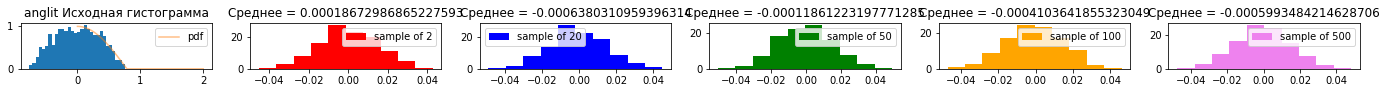

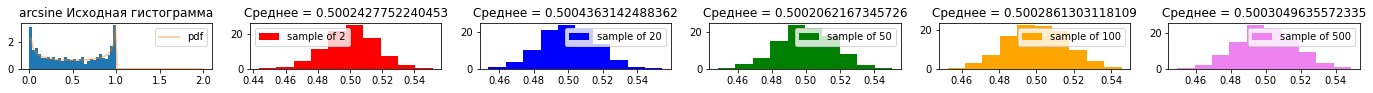

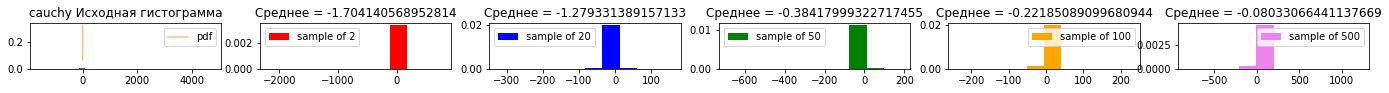

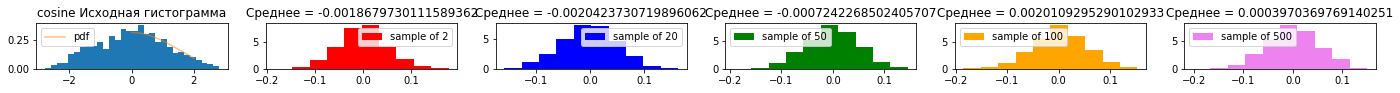

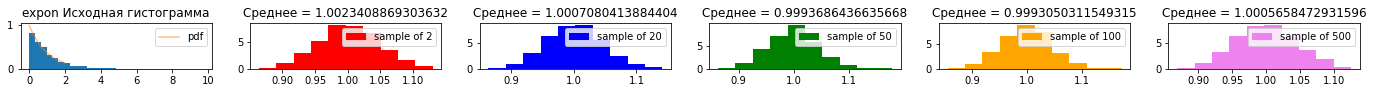

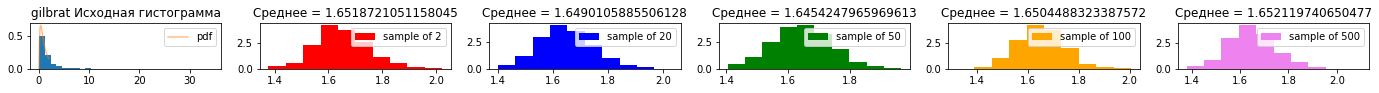

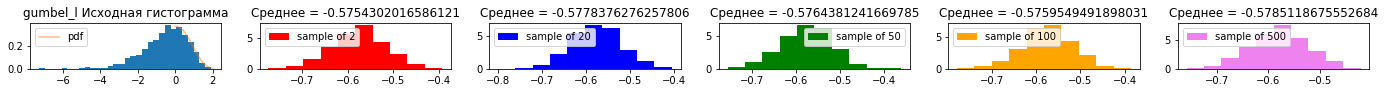

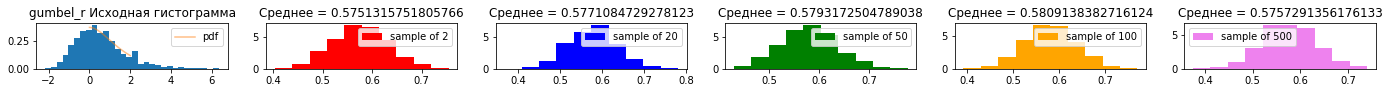

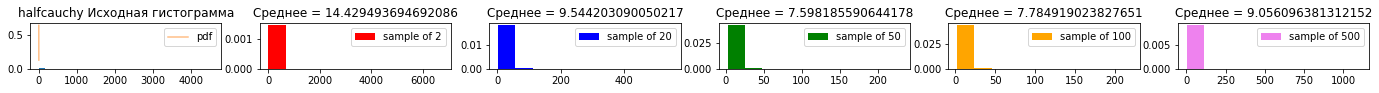

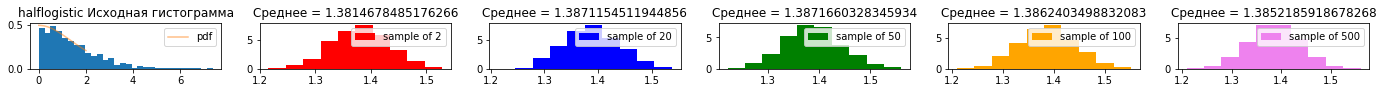

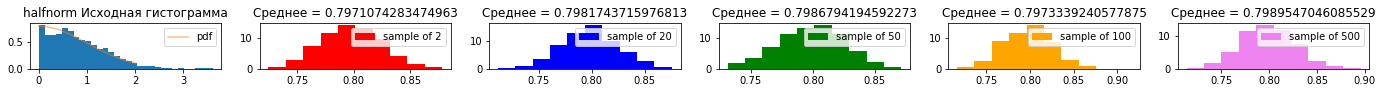

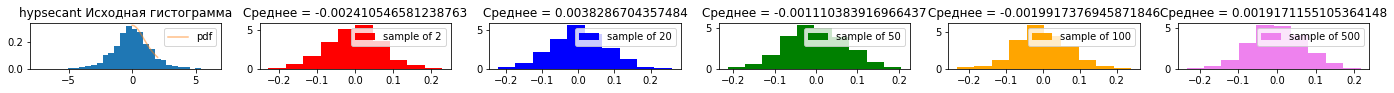

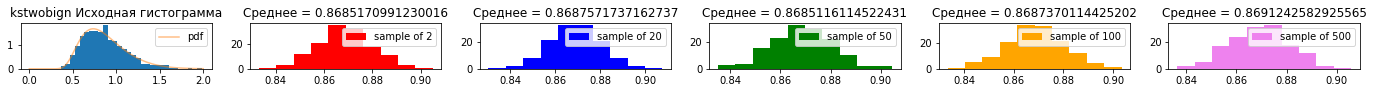

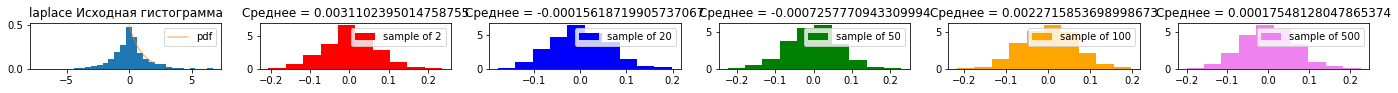

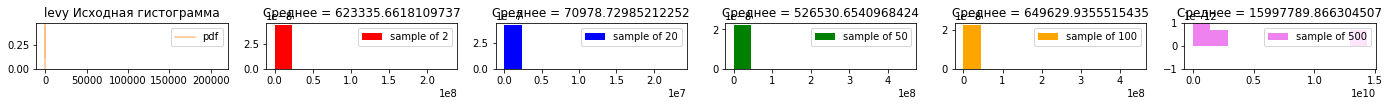

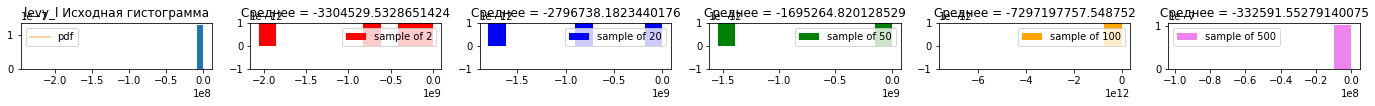

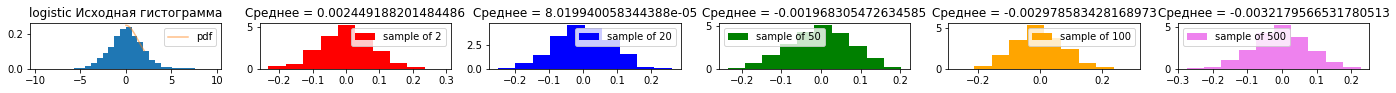

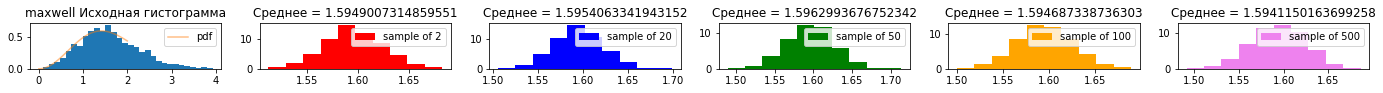

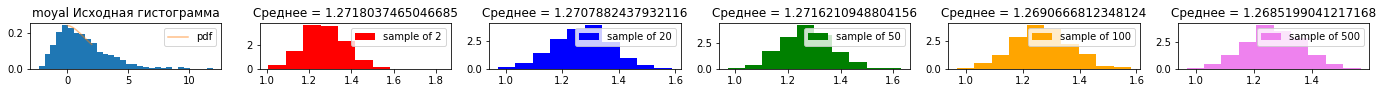

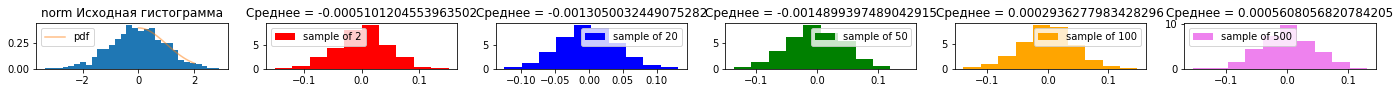

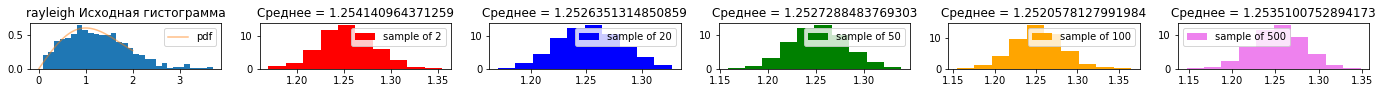

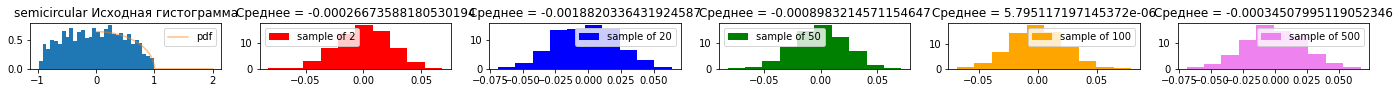

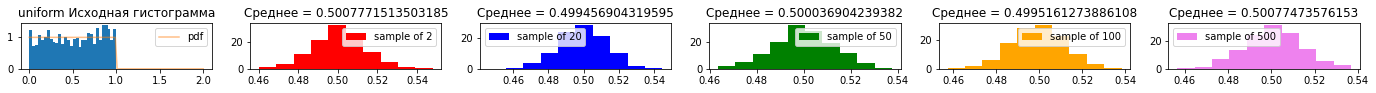

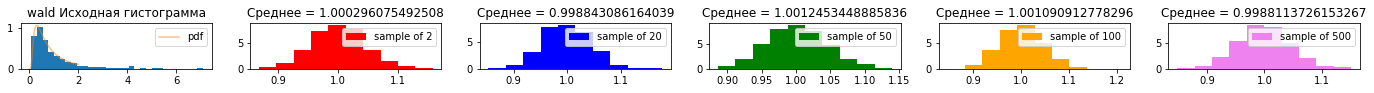

In [53]:
for function in func:
  if function.name in dist_cont and function.numargs==0:  
    try:
      get_draw_cont(function)
    except:
      pass  

Вывод: Закон больших чисел и ЦПТ работают. С увеличением размера выборки при сохранении кол-ва повторов генерации выборок распределение выборочных средних все ближе к нормальному, хотя исходное распределение случайных величин - гамма - нормальным не было 